In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
#import dc_stat_think as dcst
import seaborn as sns

In [128]:
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 20})
#plt.rc('axes', titlesize=25)     # fontsize of the axes title
#plt.rc('axes', labelsize=20)

In [5]:
jpy = pd.read_csv("JPY.csv").Close
aud = pd.read_csv("AUD.csv").Close
jpy.iloc[295] = np.mean([jpy.iloc[294], jpy.iloc[296]])
aud.iloc[295] = np.mean([aud.iloc[294], aud.iloc[296]])

In [13]:
jpy1 = np.diff(jpy)/jpy[:-1]*100
aud1 = np.diff(aud)/aud[:-1]*100

In [14]:
jpy11 = jpy1[:653]
jpy12 = jpy1[653:]

aud11 = aud1[:653]
aud12 = aud1[653:]

In [184]:
np.var(jpy11), np.var(jpy12)

(0.19622720882999725, 0.3268188141663376)

In [172]:
np.var(aud11)**0.5, np.var(aud12)**0.5

(0.6238124379172575, 0.6903373711909526)

In [187]:
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x)/np.var(y) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

In [195]:
scipy.stats.levene(aud12, aud11)

LeveneResult(statistic=16.42603548533228, pvalue=5.3580468845258825e-05)

In [199]:
scipy.stats.bartlett(aud12, aud11)

BartlettResult(statistic=6.668862130388697, pvalue=0.009811180796261714)

In [194]:
scipy.stats.levene(jpy12, jpy11)

LeveneResult(statistic=16.42603548533228, pvalue=5.3580468845258825e-05)

In [200]:
scipy.stats.bartlett(jpy12, jpy11)

BartlettResult(statistic=41.88116559368082, pvalue=9.699241982986652e-11)

In [67]:
def ulsko(r, alpha):
    
    result = []
    
    for i in range(int(len(r)/2),len(r)-1):
        
        past = r[i-652:i]
        K = np.quantile(past, alpha)
        
        if r[i+1] > K:
            result.append(0)
        
        else:
            result.append(1)
    
    return np.mean(result), np.var(result) 

    #print("E(I)")
    #print("Theoretical: ", alpha)
    #print("Hubert Urbański: ", np.mean(result))
    #print("=====================================")
    #print("Var(I)")
    #print("Theoretical: ", alpha*(1-alpha))
    #print("Roman Polański: ", np.var(result))

In [206]:
def satan(data, AAA):
    
    
    if AAA == "mean":
        
        q = np.arange(0,1.01,0.01)
        x = []
        
        for i in q:
            x.append(ulsko(data, i)[0])
        
        sns.set_theme()
        plt.xlabel('Kwantyl', fontsize = 16)
        plt.ylabel('E(I)', fontsize = 17)
        plt.plot(q, q, color = "gold", linewidth = 2.5, zorder = 4, label = "Wartości teoretyczne")
        #sns.kdeplot(hao1, linewidth=2, color = 'gold')
        plt.scatter(x, q, color='teal', s = 15, zorder = 5, label = "Wartości empiryczne")
        plt.legend()
        plt.savefig("jpy_mean.png", format="png", bbox_inches="tight")
    
    elif AAA == "var":
        
        q = np.arange(0,1.01,0.01)
        x = []
        
        for i in q:
            x.append(ulsko(data, i)[1])
        
        sns.set_theme()
        plt.xlabel('Kwantyl', fontsize = 16)
        plt.ylabel('Var(I)', fontsize = 17)
        plt.plot(q, q*(1-q), color='gold', linewidth = 2.5, zorder = 4, label = "Wartości teoretyczne")
        plt.scatter(q, x, color='teal', s = 15, zorder = 5, label = "Wartości empiryczne")
        plt.legend()
        plt.savefig("jpy_var.png", format="png", bbox_inches="tight")

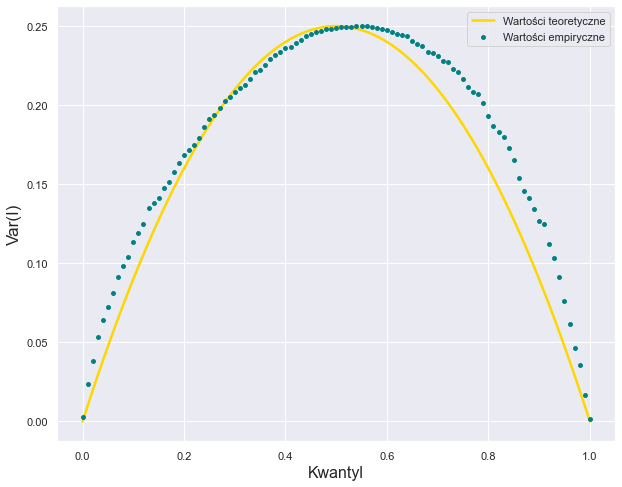

In [208]:
satan(jpy1, "var")

In [69]:
ulsko(jpy1, 0.01)[0]

0.02457757296466974